SCORE


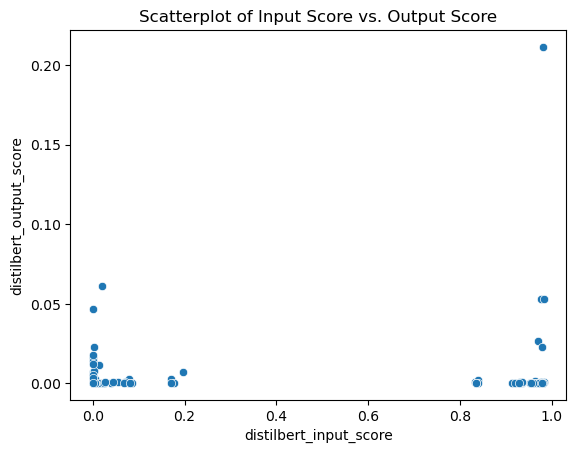

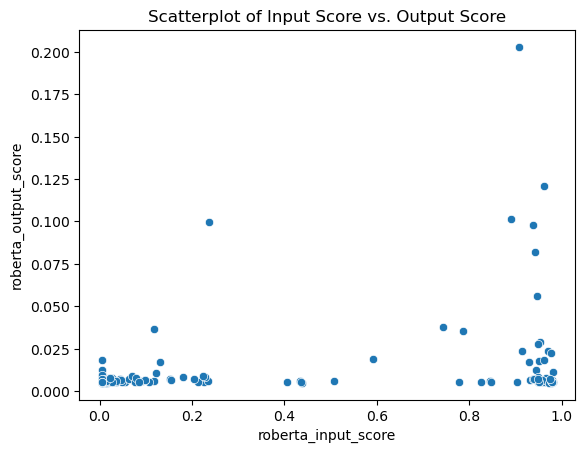

                               OLS Regression Results                              
Dep. Variable:     distilbert_output_score   R-squared:                       0.021
Model:                                 OLS   Adj. R-squared:                  0.016
Method:                      Least Squares   F-statistic:                     4.305
Date:                     Mon, 05 Feb 2024   Prob (F-statistic):             0.0393
Time:                             17:45:10   Log-Likelihood:                 534.69
No. Observations:                      200   AIC:                            -1065.
Df Residuals:                          198   BIC:                            -1059.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

/var/folders/j1/fqhbn9251h5cflbth429ww7r0000gn/T/ipykernel_15773/1089854954.py:31: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2 / (n * min_dim))
/var/folders/j1/fqhbn9251h5cflbth429ww7r0000gn/T/ipykernel_15773/1089854954.py:31: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2 / (n * min_dim))
/Users/victor/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/victor/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/victor/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separ

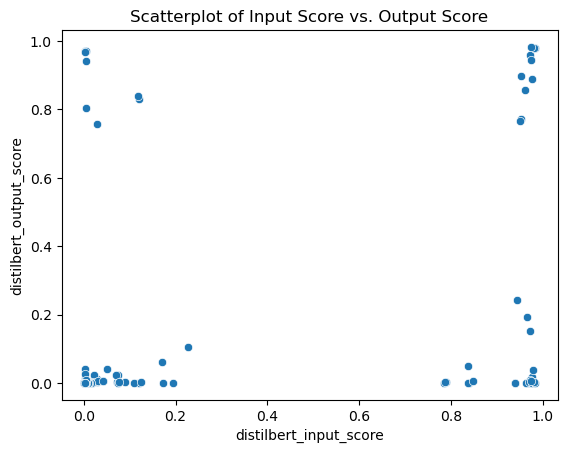

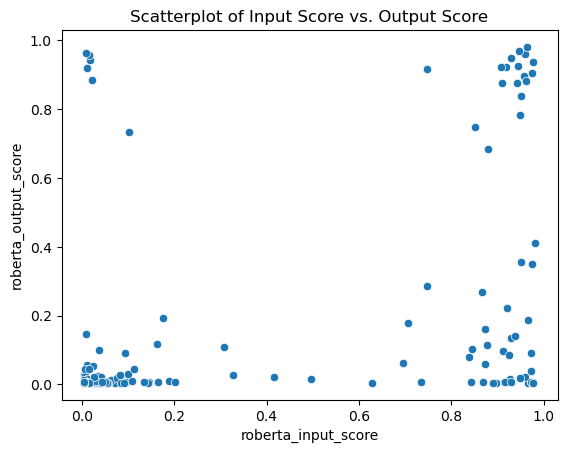

                               OLS Regression Results                              
Dep. Variable:     distilbert_output_score   R-squared:                       0.105
Model:                                 OLS   Adj. R-squared:                  0.101
Method:                      Least Squares   F-statistic:                     23.34
Date:                     Mon, 05 Feb 2024   Prob (F-statistic):           2.71e-06
Time:                             17:45:11   Log-Likelihood:               -0.73923
No. Observations:                      200   AIC:                             5.478
Df Residuals:                          198   BIC:                             12.08
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [1]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import numpy as np

tox_scores_llama2 = pd.read_csv("tox_scores_llama2_13b_chat.csv")
tox_scores_llama2_uncensored = pd.read_csv("tox_scores_llama2_13b_chat_uncensored.csv")

def plot_scatter(df,tox,var):
    sns.scatterplot(x=f'{tox}_input_{var}', y=f'{tox}_output_{var}', data=df)
    plt.title('Scatterplot of Input Score vs. Output Score')
    plt.show()

# score============
def compute_ols(df,tox):
    X = sm.add_constant(df[f"{tox}_input_score"])
    model = sm.OLS(df[f"{tox}_output_score"], X).fit()
    print(model.summary())
    
# label============    
def compute_chi_squared_cramer(df,tox):
    contingency_table = pd.crosstab(df[f'{tox}_input_label'], df[f'{tox}_output_label'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared value: {chi2}, P-value: {p_value}")
    n = contingency_table.sum().sum()  # Total number of observations
    min_dim = min(contingency_table.shape) - 1  # Minimum of the number of rows and columns
    cramer_v = np.sqrt(chi2 / (n * min_dim))
    print(f"Cramér's V: {cramer_v}")

    
def compute_logistic_regression(df,tox):
    X = sm.add_constant(df[f'{tox}_input_label'])
    model = sm.Logit(df[f'{tox}_output_label'], X).fit()
    print(model.summary())

def do_all(df):
    print("SCORE")
    plot_scatter(df,"distilbert","score")
    plot_scatter(df,"roberta","score")
    compute_ols(df,"distilbert")
    compute_ols(df,"roberta")
    print("LABEL")
    compute_chi_squared_cramer(df,"distilbert")
    compute_chi_squared_cramer(df,"roberta")
    compute_logistic_regression(df,"distilbert")
    compute_logistic_regression(df,"roberta")
    
    
do_all(tox_scores_llama2)
do_all(tox_scores_llama2_uncensored)

def find_max(df):
    print("max output for distilbert")
    print(df["distilbert_output_score"].max())
    print("corresponding input for distilbert")
    print(df.loc[df['distilbert_output_score'].idxmax(), 'distilbert_input_score'])
    print("conversation id")
    print(df.loc[df['distilbert_output_score'].idxmax(), 'conversation id'])
    print("turn")
    print(df.loc[df['distilbert_output_score'].idxmax(), 'turn'])
    
    print()
    print("max output for roberta")
    print(df["roberta_output_score"].max())
    print("corresponding input for roberta")
    print(df.loc[df['roberta_output_score'].idxmax(), 'roberta_input_score'])
    print("conversation id")
    print(df.loc[df['roberta_output_score'].idxmax(), 'conversation id'])
    print("turn")
    print(df.loc[df['roberta_output_score'].idxmax(), 'turn'])

print("LLAMA2")
find_max(tox_scores_llama2)
print()
print("LLAMA2 UNCENSORED")
find_max(tox_scores_llama2_uncensored)

In [11]:
tox_scores_llama2[(tox_scores_llama2["conversation id"] == 5)&(tox_scores_llama2["turn"] == 7)]

,Unnamed: 0.1,Unnamed: 0,conversation id,turn,score distilbert,score roberta,distilbert_input_score,distilbert_output_score,roberta_input_score,roberta_output_score,distilbert_input_label,distilbert_output_label,roberta_input_label,roberta_output_label
57,57,57,5,7,"(0.9780249893665314, 0.92467001080513)","(0.9742876903071848, 0.24986700465915435)",0.978025,0.92467,0.974288,0.249867,1,1,1,0


reference 7B


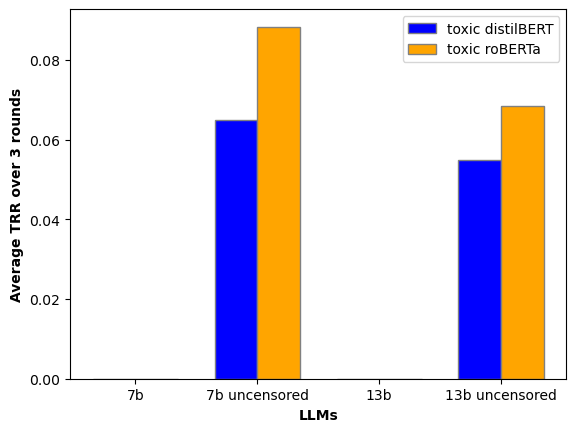

reference 7B Uncensored


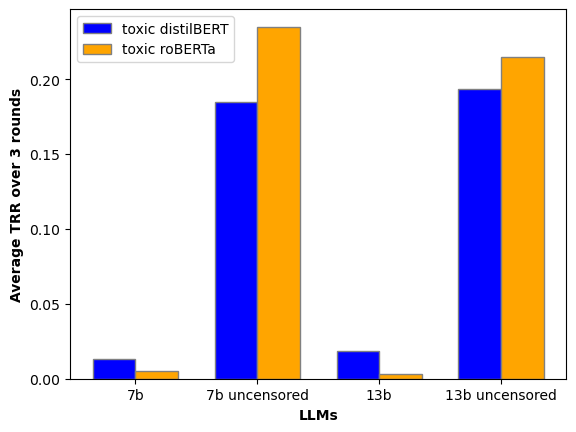

reference 13B


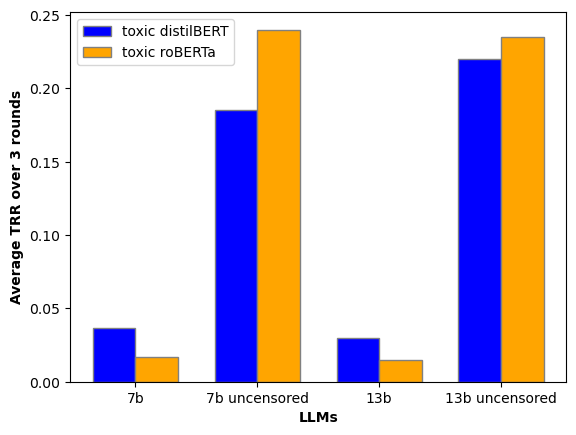

reference 13B Uncensored


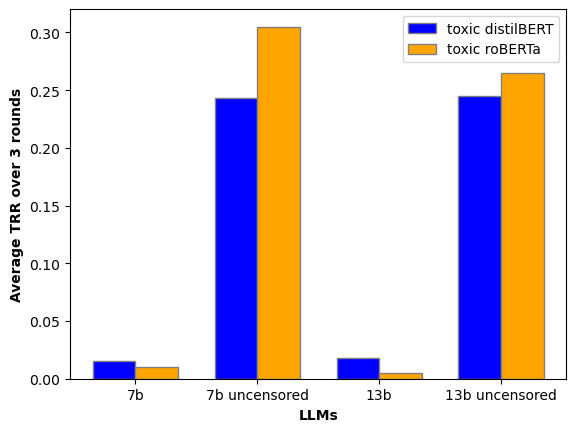

In [8]:
import matplotlib.pyplot as plt

def plot_tox_results(data_distilbert,data_roberta):
    # Data
    datasets = ['7b', '7b uncensored', '13b', '13b uncensored']
    avg_trr_distilbert = data_distilbert
    avg_trr_roberta = data_roberta

    # Bar width
    bar_width = 0.35

    # Set positions for the bars on X-axis
    r1 = range(len(datasets))
    r2 = [x + bar_width for x in r1]

    # Create the bar chart
    plt.bar(r1, avg_trr_distilbert, color='blue', width=bar_width, edgecolor='grey', label='toxic distilBERT')
    plt.bar(r2, avg_trr_roberta, color='orange', width=bar_width, edgecolor='grey', label='toxic roBERTa')

    # Add labels
    plt.xlabel('LLMs', fontweight='bold')
    plt.xticks([r + bar_width / 2 for r in range(len(datasets))], datasets)
    plt.ylabel('Average TRR over 3 rounds', fontweight='bold')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

print("reference 7B")
plot_tox_results([0.0, 0.065, 0.0, 0.055],[0.0, 0.08833333333333333, 0.0, 0.06833333333333333])

print("reference 7B Uncensored")
plot_tox_results([0.013333333333333334, 0.185, 0.018333333333333333, 0.19333333333333333],[0.005, 0.235, 0.0033333333333333335, 0.215])

print("reference 13B")
plot_tox_results([0.03666666666666667, 0.185, 0.03, 0.22],[0.016666666666666666, 0.24, 0.015, 0.235])

print("reference 13B Uncensored")
plot_tox_results([0.015, 0.24333333333333335, 0.018333333333333333, 0.245],[0.01, 0.305, 0.005, 0.265])

In [14]:
from scipy import stats

def perform_t_test(model1_data, model2_data, alpha=0.05):
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(model1_data, model2_data)
    
    print("t_stat:")
    print(t_statistic)
    print("p-value:")
    print(p_value)

    # Determine significance
    if p_value < alpha:
        return "The difference is statistically significant."
    else:
        return "The difference is not statistically significant."

# Define the toxicity rates for each pair of models
toxicity_7b = [0.0, 0.0]
toxicity_7b_uncensored = [0.065, 0.088]
toxicity_13b = [0.0, 0.0]
toxicity_13b_uncensored = [0.055,0.068]

# Perform t-test for each pair of models
print("7B CHAT vs 7B CHAT UNCENSORED:", perform_t_test(toxicity_7b, toxicity_7b_uncensored))
print("7B CHAT vs 13B CHAT:", perform_t_test(toxicity_7b, toxicity_13b))
print("7B CHAT UNCENSORED vs 13B CHAT UNCENSORED:", perform_t_test(toxicity_7b_uncensored, toxicity_13b_uncensored))
print("13B CHAT vs 7B CHAT UNCENSORED:", perform_t_test(toxicity_13b, toxicity_7b_uncensored))


t_stat:
-6.65217391304348
p-value:
0.021859886153852252
7B CHAT vs 7B CHAT UNCENSORED: The difference is statistically significant.
t_stat:
nan
p-value:
nan
7B CHAT vs 13B CHAT: The difference is not statistically significant.
t_stat:
1.135516746156697
p-value:
0.3739120966527383
7B CHAT UNCENSORED vs 13B CHAT UNCENSORED: The difference is not statistically significant.
t_stat:
-6.65217391304348
p-value:
0.021859886153852252
13B CHAT vs 7B CHAT UNCENSORED: The difference is statistically significant.


In [9]:
# Define the toxicity rates for all models
toxicity_7b = [0.0, 0.065, 0.0, 0.055]  # Replace with your actual data
toxicity_7b_uncensored = [0.013333333333333334, 0.185, 0.018333333333333333, 0.19333333333333333]  # Replace with your actual data
toxicity_13b = [0.03666666666666667, 0.185, 0.03, 0.22]  # Replace with your actual data
toxicity_13b_uncensored = [0.015, 0.24333333333333335, 0.018333333333333333, 0.245]  # Replace with your actual data

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(toxicity_7b, toxicity_7b_uncensored, toxicity_13b, toxicity_13b_uncensored)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

NameError: name 'stats' is not defined